In [74]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer      # BOW
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
print('All necessary library are imported !')

All necessary library are imported !


In [75]:
x , y =[],[]
with open('Data\SMSSpamCollection.txt','r') as file:
    data = file.read()
    for data_item in data.split("\n"):
        if len(data_item.split("\t"))==2:
            y.append(data_item.split("\t")[0])
            x.append(data_item.split("\t")[1])
print("Successfully read the data from text file and splitted into X and Y")

          

Successfully read the data from text file and splitted into X and Y


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Hp\AppData\Local\Temp\ipykernel_15268\1421424273.py:2: SyntaxWarning: invalid escape sequence '\S'
  with open('Data\SMSSpamCollection.txt','r') as file:


In [76]:
len(x),len(y)

(5574, 5574)

In [77]:
data_dict = {"mail_message":x,"label":y}
df = pd.DataFrame(data_dict)
df.head()
                  

,mail_message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   mail_message  5574 non-null   object
 1   label         5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [79]:
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]', ' ', df['mail_message'][i])
    message = message.lower()
    df['mail_message'][i]=message
df.head(10)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15268\1852559517.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['mail_message'][i]=message


,mail_message,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


In [80]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [82]:
df.sample(2000)

,mail_message,label
1678,lol where do u come up with these ideas,ham
2749,send his number and give reply tomorrow mornin...,ham
4757,don t make life too stressfull always find t...,ham
767,i m nt goin got somethin on unless they meet...,ham
432,does she usually take fifteen fucking minutes ...,ham
...,...,...
2019,ya it came a while ago,ham
5421,i m at bruce amp fowler now but i m in my mo...,ham
1013,i dunno they close oredi not v ma fan,ham
4209,or i go home first lar wait me lor i pu...,ham


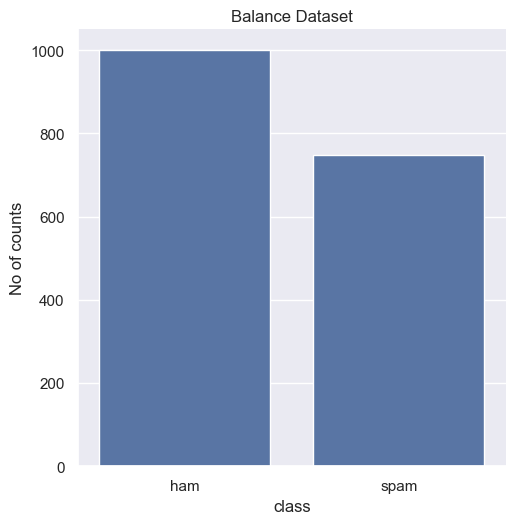

In [83]:
#filtering the dataset
ham = df[df['label']=='ham'].sample(1000)
spam =df[df['label']=='spam']

#concating the datset
balance_df = pd.concat([ham,spam])

#visualizing the dataset
classs =list(balance_df['label'].value_counts().index)
valu =list(balance_df['label'].value_counts().values)
sns.set(rc={'figure.figsize':(8,20)})
sns.catplot(x=classs,y=valu,kind='bar')
plt.title('Balance Dataset')
plt.xlabel('class')
plt.ylabel('No of counts')
plt.show()



In [84]:
#label encoding of our Dependent variable
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})

In [85]:
#checking the missing value
balance_df.isnull().sum()

mail_message    0
label           0
dtype: int64

In [86]:
print(f"Duplicates in our dataset are:-{balance_df.duplicated().sum()}")
print(f"Shape of our Dataset before remove Duplicates:-{balance_df.shape}")

Duplicates in our dataset are:-138
Shape of our Dataset before remove Duplicates:-(1747, 2)


In [87]:
#Removing Duplicates
balance_df.drop_duplicates(inplace=True)

In [88]:
print(f"Duplicates in our dataset are:-{balance_df.duplicated().sum()}")
print(f"Shape of our Dataset before remove Duplicates:-{balance_df.shape}")

Duplicates in our dataset are:-0
Shape of our Dataset before remove Duplicates:-(1609, 2)


In [89]:
#Splitted Tthe Data into x and y
x = balance_df['mail_message']
y = balance_df['label']

In [90]:
x.head()

764     nothing but we jus tot u would ask cos u ba gu...
1813     getting tickets   walsall tue   th march  my ...
1852    dunno da next show aft   is      toa payoh got...
3218             come to mahal bus stop    lt decimal gt 
4445                       come back to tampa ffffuuuuuuu
Name: mail_message, dtype: object

In [91]:
y.head()

764     0
1813    0
1852    0
3218    0
4445    0
Name: label, dtype: int64

In [92]:
#prepares single list a of mails
x =x.values
x[0:5]

array(['nothing but we jus tot u would ask cos u ba gua    but we went mt faber yest    yest jus went out already mah so today not going out    jus call lor   ',
       ' getting tickets   walsall tue   th march  my mate is getting me them on sat  ill pay my treat  want   go  txt bak  terry ',
       'dunno da next show aft   is      toa payoh got     ',
       'come to mahal bus stop    lt decimal gt ',
       'come back to tampa ffffuuuuuuu'], dtype=object)

In [93]:
x.shape

(1609,)

In [94]:
#intialaizing the bag of word class
BOW_obj = CountVectorizer(max_features=2000,stop_words='english')

In [95]:
x.shape,type(x)

((1609,), numpy.ndarray)

In [96]:
x_transformed = BOW_obj.fit_transform(x)

In [97]:
x_transformed

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12824 stored elements and shape (1609, 2000)>

In [98]:
#sparse metrix to dense metrix conversion
dense_matrix = x_transformed.toarray()
dense_matrix.shape

(1609, 2000)

In [99]:
#checking the shape of the data before splitting into training and testing
x = dense_matrix
x.shape,    y.shape


((1609, 2000), (1609,))

In [100]:
#train test split the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### MultinomialNB

In [101]:
MNB = MultinomialNB()

In [102]:
MNB.fit(x_train,y_train)

MultinomialNB()

### accuracy

In [103]:
MNB.score(x_train,y_train)

0.9844599844599845

In [104]:
MNB.score(x_test,y_test)

0.9596273291925466

### prediction

In [105]:
pred = MNB.predict(x_test)

In [106]:
confusion_matrix(y_test,pred)

array([[182,   5],
       [  8, 127]])

<Axes: >

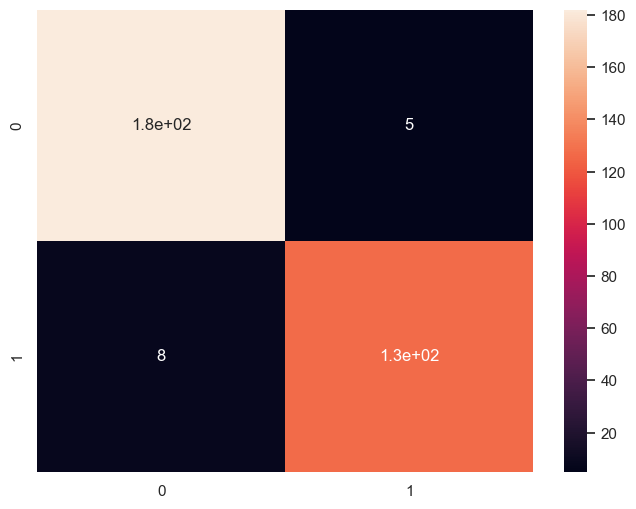

In [107]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

In [108]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       187
           1       0.96      0.94      0.95       135

    accuracy                           0.96       322
   macro avg       0.96      0.96      0.96       322
weighted avg       0.96      0.96      0.96       322



In [109]:
pickle.dump(BOW_obj,open('vectorizer.pkl','wb'))

In [110]:
pickle.dump(MNB,open('spamclassifier_MNB.pkl','wb'))

In [111]:
compare_dict ={'actual':y_test,'pred':pred}
comparison_df = pd.DataFrame(compare_dict)
comparison_df.head(30)

,actual,pred
3456,0,0
732,0,0
1460,1,1
3879,0,0
3543,0,0
2436,0,0
985,0,0
4666,0,0
4844,0,0
4739,0,0
